In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.cluster import KMeans

In [7]:
#dados = pd.read_csv('dadoslimpos.csv')
dados = pd.read_json('dadoslimpos.json')

#notas em conceitos
bins = [0, 45, 49, 69, 89, 100]
group_names = ['F', 'D', 'C', 'B', 'A']
dados['nota_conceito'] = pd.cut(dados['media_final'], bins, labels=group_names, include_lowest=True)
dados

#exibindo todas as colunas
pd.set_option('display.max_columns', None)

#removendo coluna acrescentada devido ao csv
#dados.drop('Unnamed: 0', axis=1, inplace=True)
dados.shape
dados

,aluno_exclusivo_rede_publica,aluno_id,ano_letivo__ano,ano_letivo__ano_aluno,categorias,cep,ch_hora_relogio,codigo_censup,codigo_siape,descricao,descricao_afastamento,descricao_area_residencial,descricao_companhia_domiciliar,descricao_estado_civil,descricao_historico,descricao_imovel,descricao_internet,descricao_mae_escolaridade,descricao_pai_escolaridade,descricao_raca,descricao_responsavel_escolaridade,descricao_responsavel_financeiro,descricao_saude,descricao_situacao_matricula,descricao_trabalho,descricao_trabalho_responsavel,ensino_fundamental_conclusao,ficou_tempo_sem_estudar,inativo_siape,local_acesso_internet,media_final,nome_escola_ensino_fundamental,nome_escola_ensino_medio,percentual_frequencia,periodo_letivo,pessoa_fisica__nascimento_data,possui_necessidade_especial,qnt_pc,qtd_filhos,qtd_pessoas_domicilio,quantidade_smartphones,renda_bruta_familiar,tempo_sem_estudar,nota_conceito
0,True,471409825937,2016,2015,D,59082-420,60,0,9,Técnico de Nível Médio em Segurança do Trabalh...,missing,Urbana,Sozinho(a),Casado(a),Introdução ao Direito(60H),Financiado,missing,Ensino médio incompleto,Ensino superior completo,Não declarado,Ensino superior completo,O próprio aluno,missing,Trancado,Serviço público,Serviço público,2000,1,False,missing,85,Colégio Salesiano São José,Colégio Salesiano São José,100,1,17/06/1986,True,1,1,1,1,1911.3,-1,B
1,True,471409825937,2016,2015,D,59082-420,60,0,9,Técnico de Nível Médio em Segurança do Trabalh...,missing,Urbana,Sozinho(a),Casado(a),Introdução à Segurança do Trabalho(60H),Financiado,missing,Ensino médio incompleto,Ensino superior completo,Não declarado,Ensino superior completo,O próprio aluno,missing,Trancado,Serviço público,Serviço público,2000,1,False,missing,80,Colégio Salesiano São José,Colégio Salesiano São José,90,1,17/06/1986,True,1,1,1,0,1911.3,-1,B
10,True,471409825937,2016,2015,D,59082-420,60,0,9,Técnico de Nível Médio em Segurança do Trabalh...,missing,Urbana,Sozinho(a),Casado(a),Gestão de Saúde e Segurança Ocupacional(60H),Financiado,missing,Ensino médio incompleto,Ensino superior completo,Não declarado,Ensino superior completo,O próprio aluno,missing,Trancado,Serviço público,Serviço público,2000,1,False,missing,100,Colégio Salesiano São José,Colégio Salesiano São José,95,2,17/06/1986,True,1,1,1,0,1911.3,-1,A
100,False,380893120557,2014,2013,D,59650-000,60,2,6,Técnico de Nível Médio em Segurança do Trabalh...,Necessidade de trabalhar para ajudar no susten...,Urbana,Pais,Solteiro(a),Língua Portuguesa,Financiado,Diariamente,Ensino fundamental incompleto,Ensino fundamental incompleto,Preta,Ensino superior completo,O próprio aluno,missing,Trancado,Serviço público,Serviço público,0,1,False,De casa.,78,missing,Escola Estadual Juscelino Kubitscheck,100,1,19/08/1985,False,2,1,4,0,1950.0,3,B
1000,False,463374429513,2015,2015,E,59290-000,60,1,1,Técnico de Nível Médio em Segurança do Trabalh...,missing,Urbana,Cônjuge,Casado(a),Psicologia do Trabalho(60H),Próprio,Diariamente,Ensino médio completo,Ensino médio completo,Branca,Ensino médio completo,O próprio aluno,Sistema Único de Saúde - SUS,Jubilado,Serviço público,Serviço público,1983,0,False,Em casa,0,Escola Municipal joão XXIII,"E,E Prof º. Francisco Ivo Cavalcanti",90,2,07/03/1966,False,3,2,5,2,1700.0,-1,F
10000,False,471183987245,2016,2015,E,59650-000,60,0,9,Técnico de Nível Médio em Segurança do Trabalh...,Nunca parou de estudar,Urbana,Cônjuge,Casado(a),Língua Portuguesa,Próprio,Diariamente,Ensino médio incompleto,Ensino fundamental completo,Não declarado,Ensino médio completo,Cônjuge,missing,Jubilado,Não está trabalhando,Não informado,0,1,False,CELULAR,0,missing,INSTITUTO PADRE IBIAPINA,100,1,16/09/1987,True,0,1,3,1,724.0,0,F
10001,False,471183987245,2016,2015,E,59650-000,30,0,9,Técnico de Nível Médio em Segurança do Trabalh...,Nunca parou de estudar,Urbana,Cônjuge,Casado(a),Estatística Aplicada à Segurança do Trabalho(30H),Próprio,Diariamente,Ensino médio incompleto,Ensino fundamental completo,Não declarado,Ensino médio completo,Côn

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:889: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


[[  0.        ]
 [ 84.53508772]
 [ 64.14074074]]
[[  1.06981982]
 [ 33.83088235]
 [ 79.68207499]]
[[  3.78384443]
 [ 38.94395797]
 [ 76.63180393]]


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


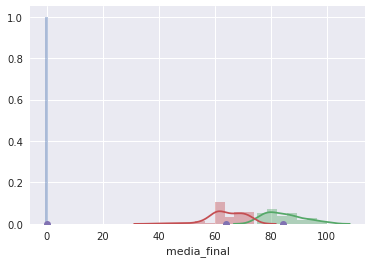

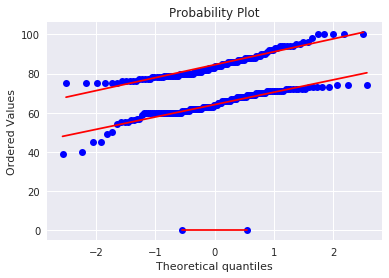

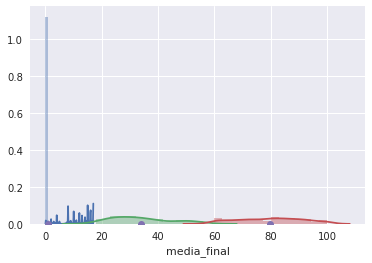

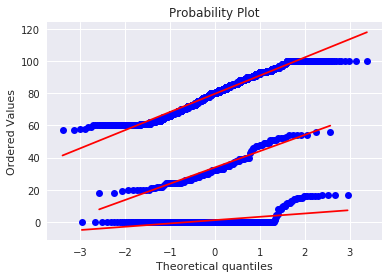

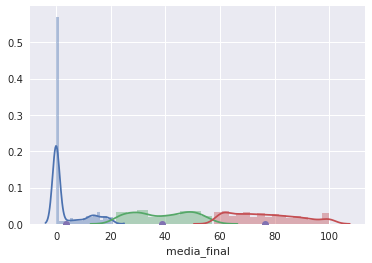

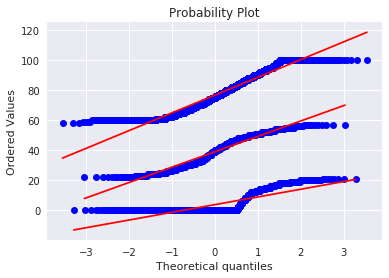

In [14]:
"""
é realizado a clusterização por disciplina em dois grupos (alunos aprovado e reprovados). é criado dentro do frame um novo
atributo chamado 'classe', o qual identifica a qual grupo aquele aluno pertence (0 reprovado, 1 aprovado). 

aqui a operação está limitada em 3, uma vez que a mesma gera gráficos e ficaria muito pesado o processamento. 
na cell seguinte a operação é realizada de forma completa sem gerar os gráficos
"""

%matplotlib inline
plt.close('all')

merged = dados

#cria coluna 'classe' no frame merged inicializado com -1, a fim de controle
merged['classe'] = np.ones(merged.shape[0])*-1

#definir linha que divide os clusters (alunos bons e ruins)
cnt = 0

for index1, group1 in merged.groupby(['descricao']):    
    
    #recuperando as notas apenas daquela disciplina    
    data = merged[merged.descricao == index1]['media_final']
    
    #recuperando os clusters
    cluster = KMeans(n_clusters=3, init=np.array([[0], [5], [10]]))
    cluster.fit(data.reshape(-1,1))
    print(cluster.cluster_centers_)
        
    #atribuindo a classe
    merged.loc[merged.descricao == index1, 'classe'] = cluster.predict(data.reshape(-1,1))
    
    #print(merged.classe.unique())
    
    #figura mostrando a clusterizacao
    fig = plt.figure()
    sns.distplot( merged[(merged.descricao == index1) & (merged.classe == 0)]['media_final'] )
    sns.distplot( merged[(merged.descricao == index1) & (merged.classe == 1)]['media_final'] )
    sns.distplot( merged[(merged.descricao == index1) & (merged.classe == 2)]['media_final'] )
    plt.plot(cluster.cluster_centers_, [0, 0, 0], "o")
    
    #figura mostrando o ajuste dos dados aos clusters
    fig = plt.figure()
    stats.probplot(merged[(merged.descricao == index1) & (merged.classe == 0)]['media_final'], plot=plt)
    stats.probplot(merged[(merged.descricao == index1) & (merged.classe == 1)]['media_final'], plot=plt)
    stats.probplot(merged[(merged.descricao == index1) & (merged.classe == 2)]['media_final'], plot=plt)
    
    cnt += 1
    if cnt == 3:
        break